In [2]:
# Import required libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [3]:
# A function to check and adjust the list accordingly and enusre they are all the same length
def check(data):

    # Adjust the team nammes
    cleaned_list = []
    for i in range(len(data)):
        if len(data[i]) == 13:
            clean_data = [data[i][0]] + [' '.join(data[i][1:3])] + data[i][3:]
            cleaned_list.append(clean_data)
        elif len(data[i]) > 13:
            clean_data = [data[i][0]] + [' '.join(data[i][1:4])] + data[i][4:]
            cleaned_list.append(clean_data)
        elif len(data[i]) == 12:
            cleaned_list.append(data[i])

    return cleaned_list

In [4]:
driver = webdriver.Chrome()

season = 2023

page_url = f"https://understat.com/league/EPL/{season}"
driver.get(page_url) 

name = driver.find_elements(By.ID, 'league-chemp')[0]
table = name.text.split('\n')

# Breaks the table into a list of list
data = [line.split() for line in table] 

# Checks the length of each list item and sorts accordingly
cleaned_list = check(data)

# Transform to a dataframe
df = pd.DataFrame(cleaned_list)

# Assign the first row of the list as the column header
df.columns = df.iloc[0]
df = df[1:]

# Split columns on '-' and '+'
split_columns = ['xG', 'xGA', 'xPTS']
for col in split_columns:
    df[col+'_1'] = df[col].str.split('[\+\-]', expand=True)[0]
# Drop original columns
df.drop(columns=split_columns, inplace=True)

# Rename the column 
df.rename(columns = {'№':'Position',
                    'M':'MP',
                    'W':'Wins',
                    'D':'Draw',
                    'L':'Loss',
                    'G':'GF',
                    'xG_1' : 'xG',
                    'xGA_1' : 'xGA',
                    'xPTS_1' : 'xPTS'}, inplace=True)

# Calculate Goal Difference
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GF'] - df['GA']

driver.close()

<>:27: SyntaxWarning: invalid escape sequence '\+'
<>:27: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Razak\AppData\Local\Temp\ipykernel_4220\663268920.py:27: SyntaxWarning: invalid escape sequence '\+'
  df[col+'_1'] = df[col].str.split('[\+\-]', expand=True)[0]


In [5]:
df['badge'] = df['Team'].apply(
    lambda x: fr"\Users\Razak\Desktop\Team Logos\Premier League/{x.lower()}.png"
)

In [6]:
df = df.loc[:,['Position','badge','Team','MP','Wins','Draw','Loss','GF','xG','GA','xGA','GD','PTS','xPTS']]
df.head()

,Position,badge,Team,MP,Wins,Draw,Loss,GF,xG,GA,xGA,GD,PTS,xPTS
1,1,\Users\Razak\Desktop\Team Logos\Premier League...,Arsenal,28,20,4,4,70,61.19,24,22.85,46,64,60.26
2,2,\Users\Razak\Desktop\Team Logos\Premier League...,Liverpool,28,19,7,2,65,65.57,26,35.15,39,64,55.03
3,3,\Users\Razak\Desktop\Team Logos\Premier League...,Manchester City,28,19,6,3,63,62.01,28,27.96,35,63,59.82
4,4,\Users\Razak\Desktop\Team Logos\Premier League...,Aston Villa,29,17,5,7,60,56.24,42,45.84,18,56,47.71
5,5,\Users\Razak\Desktop\Team Logos\Premier League...,Tottenham,28,16,5,7,59,54.05,42,49.69,17,53,42.85


In [7]:
bg_color = "#D4CDC3"
text_color = "#000000"
row_colors = {
    "first":"#FFD700",
    "top4":"#85FF9E",
    "europa_league":"#69EBD0",
    "conference_league":"#F8F991",
    "relegation":"#D63230"
}

plt.rcParams["text.color"] = text_color
plt.rcParams['font.family'] ="monospace"

In [8]:
# Create ColumnDefinitions for the table
# I'll show you how to do 3 things the columns
# 1. load images
# 2. add color
# 3. add columns to groups
col_defs = [
    ColumnDefinition(
        name="Position",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Wins",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Draw",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Loss",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="For",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="For",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Against",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xGA",
        group="Against",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        #group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="PTS",
        group="Points",
        textprops={"ha": "center", "color": "#FFFFFF", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.50}},
        #cmap=normed_cmap(df["PTS"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xPTS",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    )
]

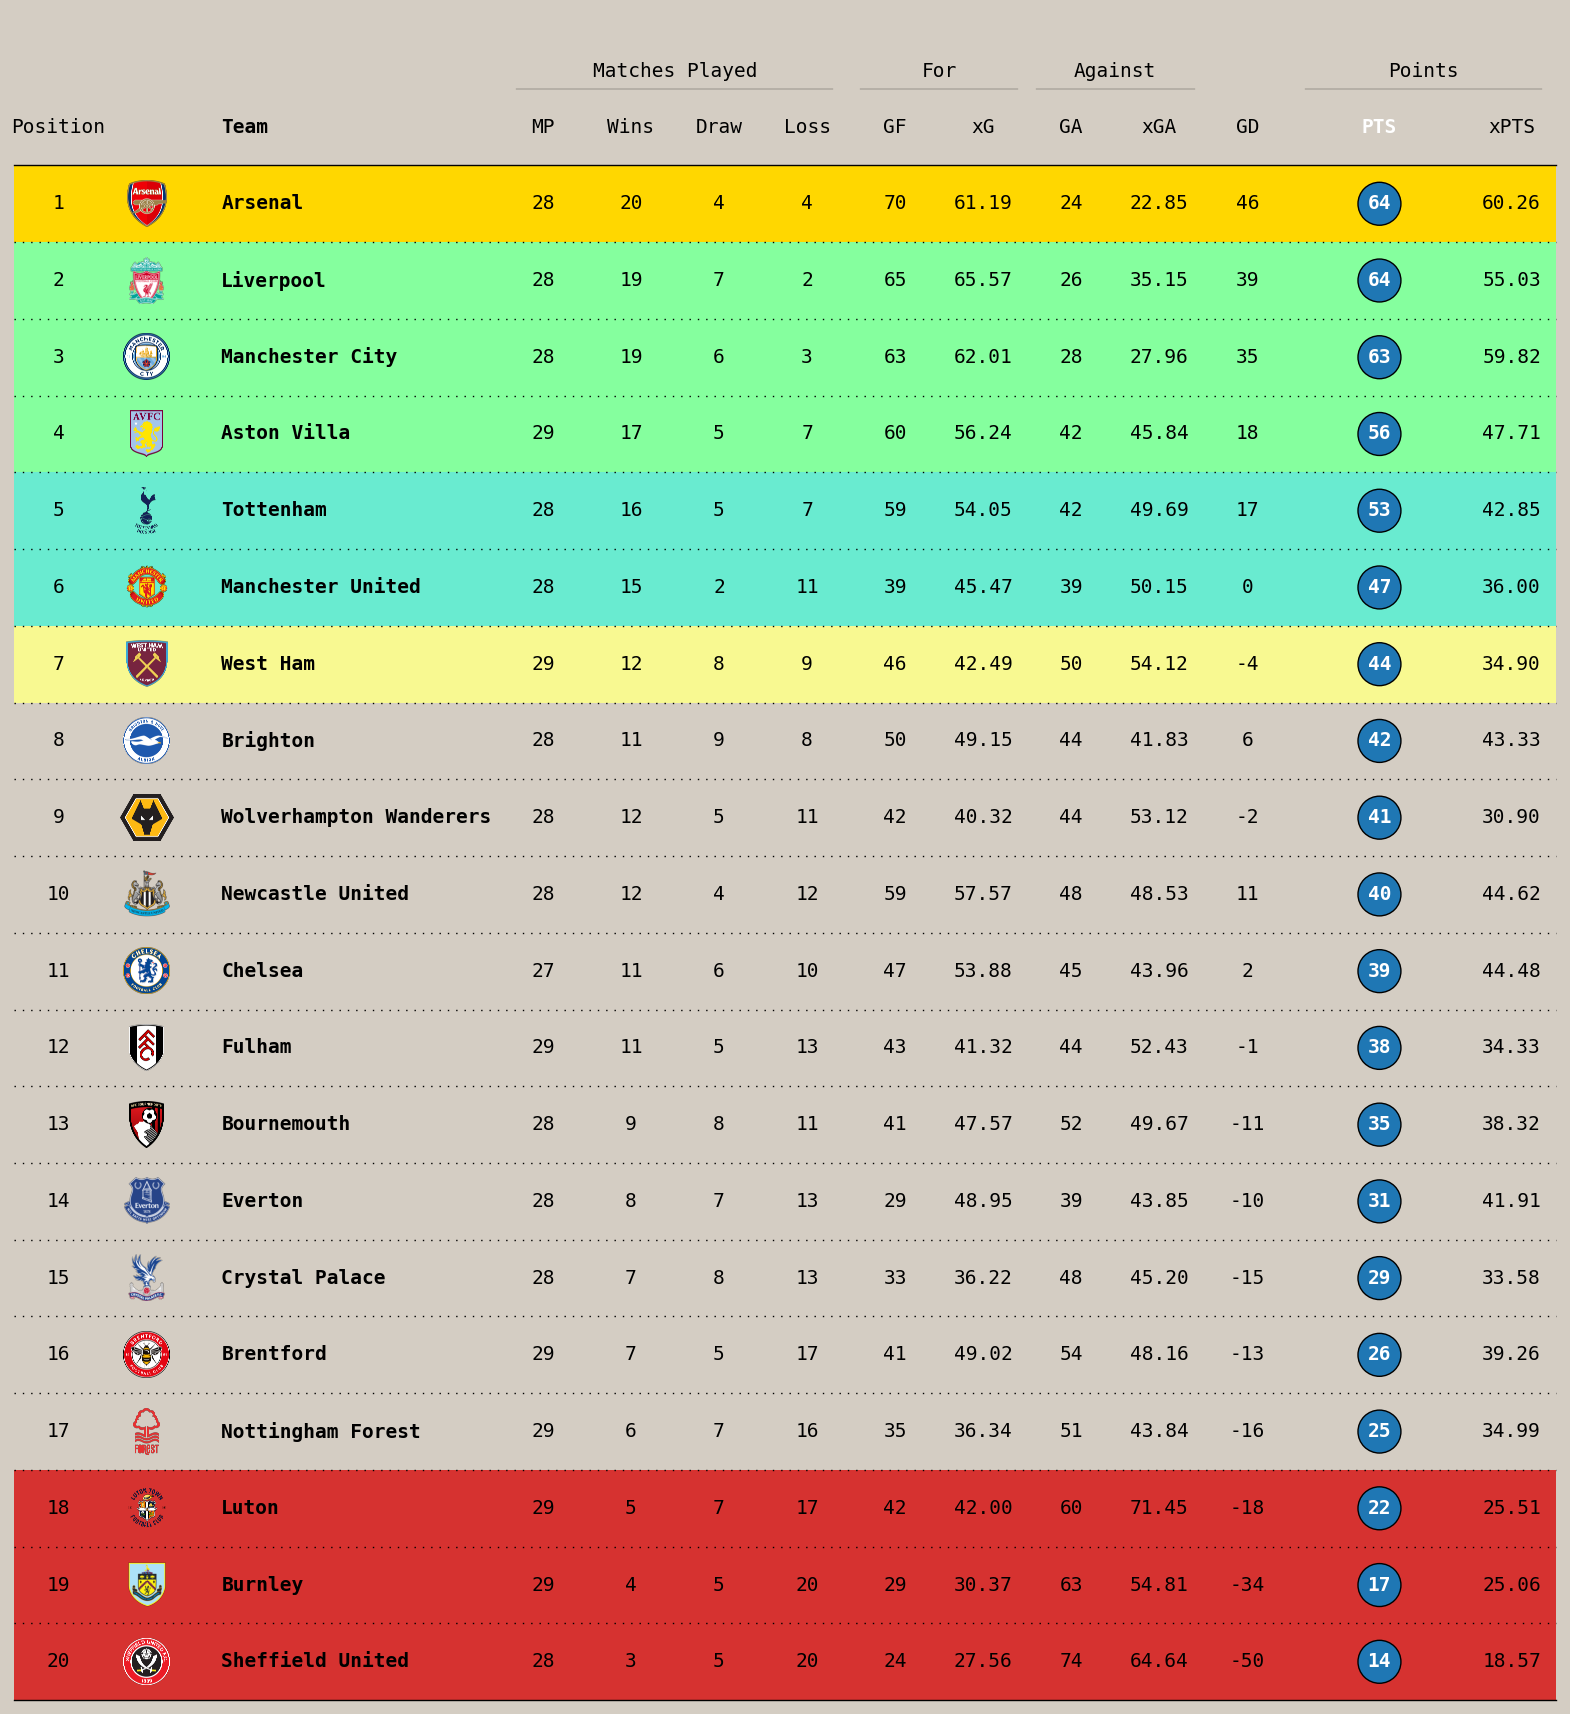

In [9]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Position",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA"]) # This will set the font color of the columns based on the cmap so the text is readable

#table.cells[10, 3].textprops["color"] = "#8ACB88"
for idx in [0]:
    table.rows[idx].set_facecolor(row_colors['first'])

for idx in [1,2,3]:
    table.rows[idx].set_facecolor(row_colors['top4'])

for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["europa_league"])

for idx in [6]:
    table.rows[idx].set_facecolor(row_colors['conference_league'])

for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])


In [10]:
fig.savefig("/Users/Razak/Desktop/new_premier_league_table.png",
            facecolor = ax.get_facecolor(),
            dpi=200,
            bbox_inches='tight')